In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
# Load the .pth files for all models
qcnn_checkpoint = torch.load("models/qcnn_model.pth")
qcnn_lstm_checkpoint = torch.load("models/qcnn_lstm_model.pth")
qcnn_rnn_checkpoint = torch.load("models/qcnn_rnn_model.pth")
cnn_checkpoint = torch.load("cnn_model.pth")

C:\Users\Asus\AppData\Local\Temp\ipykernel_3764\1662558340.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  qcnn_checkpoint = torch.load("models/qcnn_model.pth")
C:\Users

In [3]:
# Extract training and validation history from logs for QCNN
qcnn_train_acc = qcnn_checkpoint['train_accuracies']
qcnn_val_acc = qcnn_checkpoint['val_accuracies']

In [4]:
# Extract training and validation history from logs for QCNN with LSTM
qcnn_lstm_train_acc = qcnn_lstm_checkpoint['train_accuracies']
qcnn_lstm_val_acc = qcnn_lstm_checkpoint['val_accuracies']

In [5]:
# Extract training and validation history from logs for QCNN with RNN
qcnn_rnn_train_acc = qcnn_rnn_checkpoint['train_accuracies']
qcnn_rnn_val_acc = qcnn_rnn_checkpoint['val_accuracies']

In [6]:
# Extract training and validation history from logs for CNN
cnn_train_acc = cnn_checkpoint['train_accuracies']
cnn_val_acc = cnn_checkpoint['val_accuracies']

In [7]:
# Verify the contents
print("QCNN Training Accuracy:", qcnn_train_acc)
print("QCNN LSTM Training Accuracy:", qcnn_lstm_train_acc)
print("QCNN RNN Training Accuracy:", qcnn_rnn_train_acc)
print("CNN Training Accuracy:", cnn_train_acc)

QCNN Training Accuracy: [93.71831688502428, 96.64868895713715, 96.52391628884912, 96.27626161792533, 96.83011854993113, 97.99500022165746, 97.56331548875028, 97.51662591615558, 97.59352033012306, 98.06119197322538, 98.10282955437897, 96.72446614880246, 97.99298447213158, 97.9481191389447, 96.9556994970299, 98.3927681374565, 98.55698180265371, 94.59791056611154, 97.95769612245626, 98.43977057053911, 98.44234609502239, 98.09527495898242, 98.39940321999009, 98.36341759709505, 98.0651066947576, 98.58405499947332, 98.24437468465894, 98.67224300491655, 97.81576428413466, 98.5523840077155, 97.47188264724042, 98.29351744387004, 98.40309458308663, 98.31785086031954, 97.89454088634308, 98.32901036195805, 98.23745737157687, 98.64364118575664, 98.73637969665884, 98.27845331744359, 98.83737269860102, 98.5986286276835, 98.74051633145694, 98.81180479597042, 98.75740591730484, 98.73441584053691, 98.83972945098554, 98.85432756392962, 98.79282358855377, 98.83801528952677, 98.77531080956001, 98.811161432

In [8]:
# Extract the number of epochs for each model
epochs_qcnn = range(1, len(qcnn_train_acc) + 1)
epochs_qcnn_lstm = range(1, len(qcnn_lstm_train_acc) + 1)
epochs_qcnn_rnn = range(1, len(qcnn_rnn_train_acc) + 1)
epochs_cnn = range(1, len(cnn_train_acc) + 1)

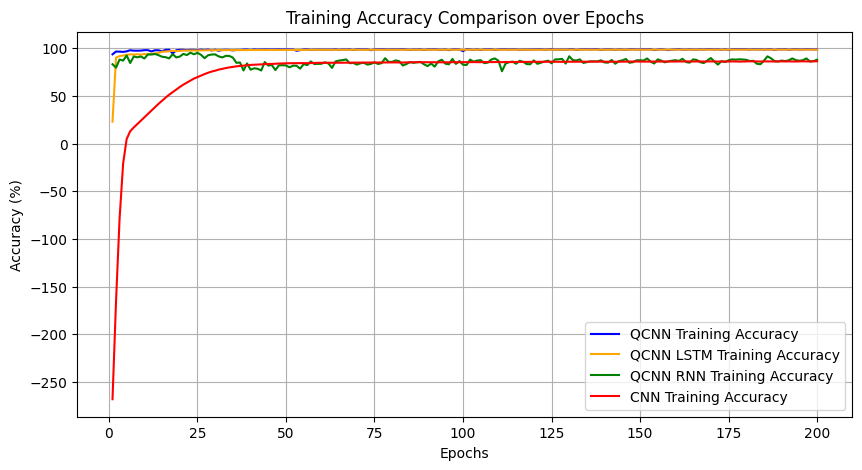

In [9]:
# Plot Training Accuracy over Epochs for all models
plt.figure(figsize=(10, 5))
plt.plot(epochs_qcnn, qcnn_train_acc, label="QCNN Training Accuracy", color='blue')
plt.plot(epochs_qcnn_lstm, qcnn_lstm_train_acc, label="QCNN LSTM Training Accuracy", color='orange')
plt.plot(epochs_qcnn_rnn, qcnn_rnn_train_acc, label="QCNN RNN Training Accuracy", color='green')
plt.plot(epochs_cnn, cnn_train_acc, label="CNN Training Accuracy", color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy Comparison over Epochs')
plt.legend()
plt.grid(True)
plt.show()

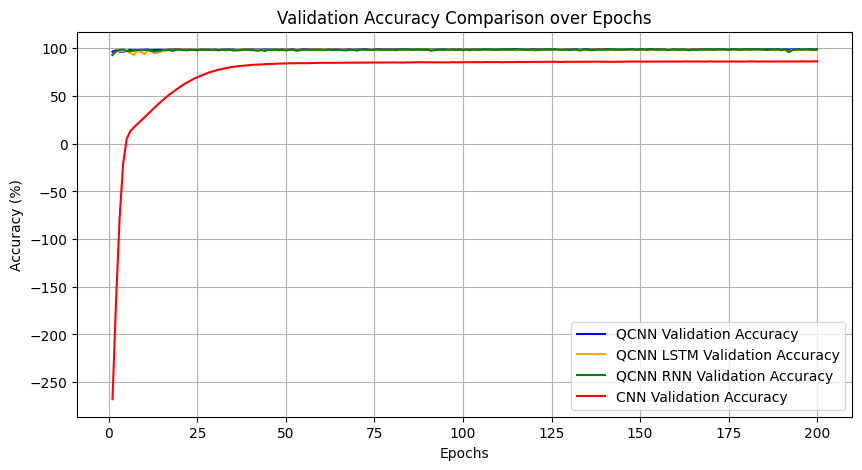

In [10]:
# Plot Validation Accuracy over Epochs for all models
plt.figure(figsize=(10, 5))
plt.plot(epochs_qcnn, qcnn_val_acc, label="QCNN Validation Accuracy", color='blue')
plt.plot(epochs_qcnn_lstm, qcnn_lstm_val_acc, label="QCNN LSTM Validation Accuracy", color='orange')
plt.plot(epochs_qcnn_rnn, qcnn_rnn_val_acc, label="QCNN RNN Validation Accuracy", color='green')
plt.plot(epochs_cnn, cnn_val_acc, label="CNN Validation Accuracy", color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy Comparison over Epochs')
plt.legend()
plt.grid(True)
plt.show()

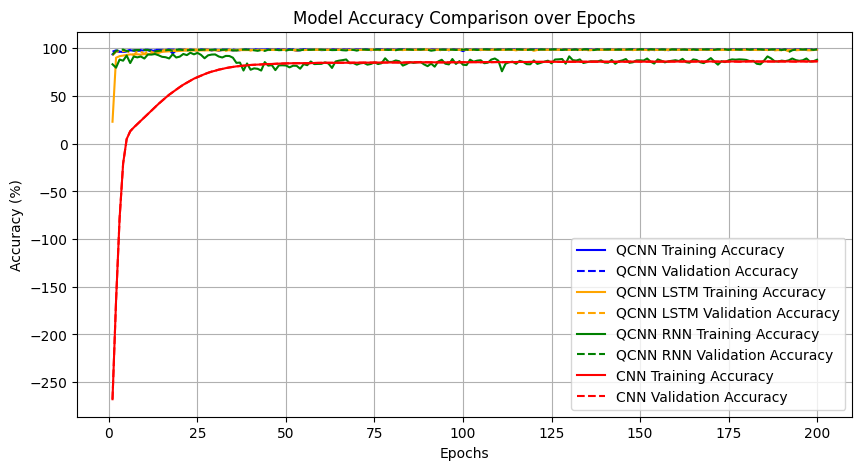

In [11]:
# Plot Combined Model Accuracy over Epochs
plt.figure(figsize=(10, 5))
plt.plot(epochs_qcnn, qcnn_train_acc, label="QCNN Training Accuracy", color='blue')
plt.plot(epochs_qcnn, qcnn_val_acc, label="QCNN Validation Accuracy", color='blue', linestyle='--')

plt.plot(epochs_qcnn_lstm, qcnn_lstm_train_acc, label="QCNN LSTM Training Accuracy", color='orange')
plt.plot(epochs_qcnn_lstm, qcnn_lstm_val_acc, label="QCNN LSTM Validation Accuracy", color='orange', linestyle='--')

plt.plot(epochs_qcnn_rnn, qcnn_rnn_train_acc, label="QCNN RNN Training Accuracy", color='green')
plt.plot(epochs_qcnn_rnn, qcnn_rnn_val_acc, label="QCNN RNN Validation Accuracy", color='green', linestyle='--')

plt.plot(epochs_cnn, cnn_train_acc, label="CNN Training Accuracy", color='red')
plt.plot(epochs_cnn, cnn_val_acc, label="CNN Validation Accuracy", color='red', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison over Epochs')
plt.legend()
plt.grid(True)
plt.show()